# Explore here

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import statsmodels.api as sm
from scipy import stats
from lazypredict.Supervised import LazyRegressor



In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

In [3]:
df.shape
df.columns
df = df.drop_duplicates()


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

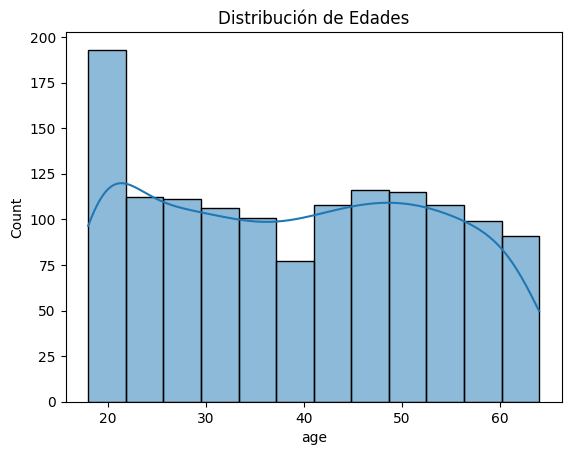

In [5]:
sns.histplot(data=df, x='age', kde=True)
plt.title('Distribución de Edades')
plt.show()

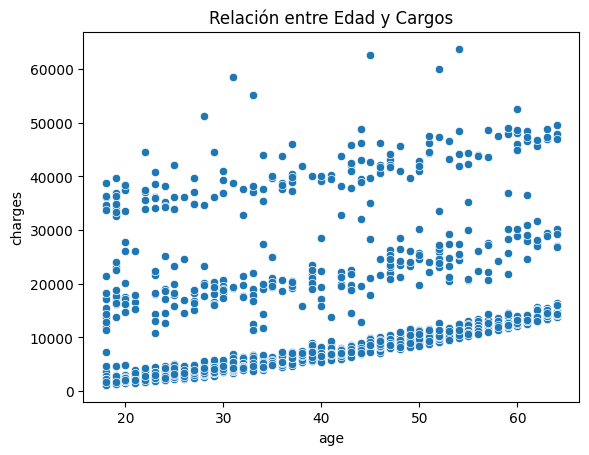

In [6]:
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Relación entre Edad y Cargos')
plt.show()

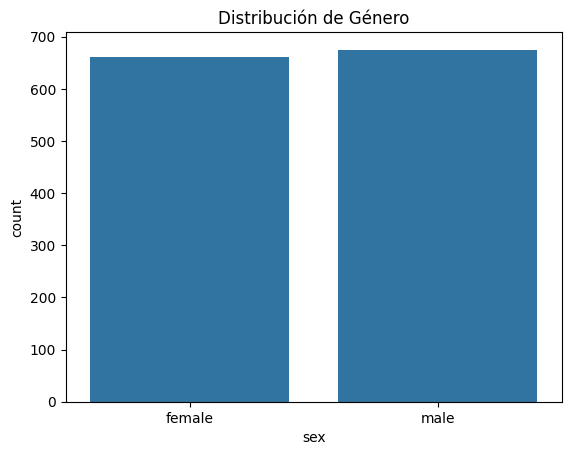

In [7]:
sns.countplot(data=df, x='sex')
plt.title('Distribución de Género')
plt.show()

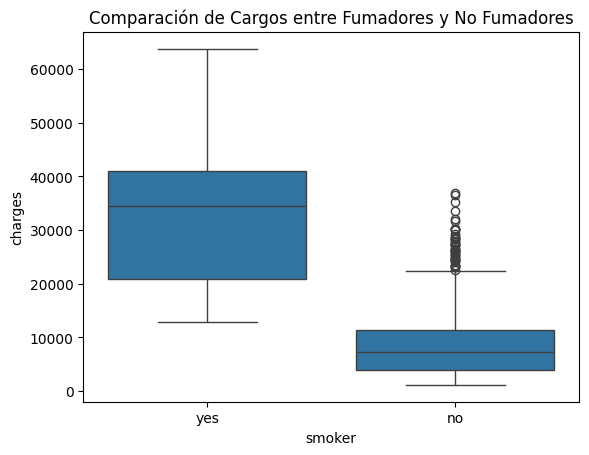

In [8]:
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Comparación de Cargos entre Fumadores y No Fumadores')
plt.show()

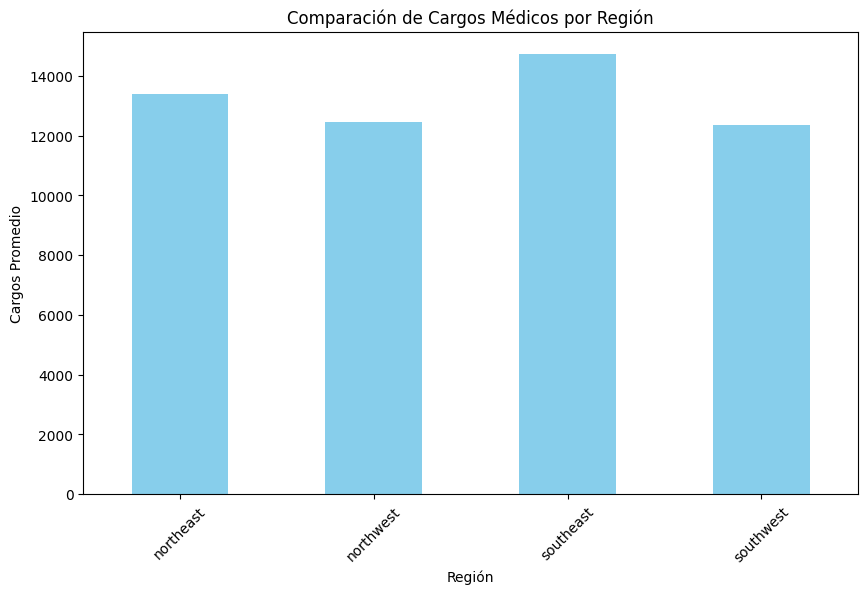

In [9]:
# Agrupa los datos por la columna 'region' y calcula el promedio de 'charges' en cada región
region_charges_mean = df.groupby('region')['charges'].mean()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
region_charges_mean.plot(kind='bar', color='skyblue')
plt.title('Comparación de Cargos Médicos por Región')
plt.xlabel('Región')
plt.ylabel('Cargos Promedio')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad

# Muestra el gráfico
plt.show()

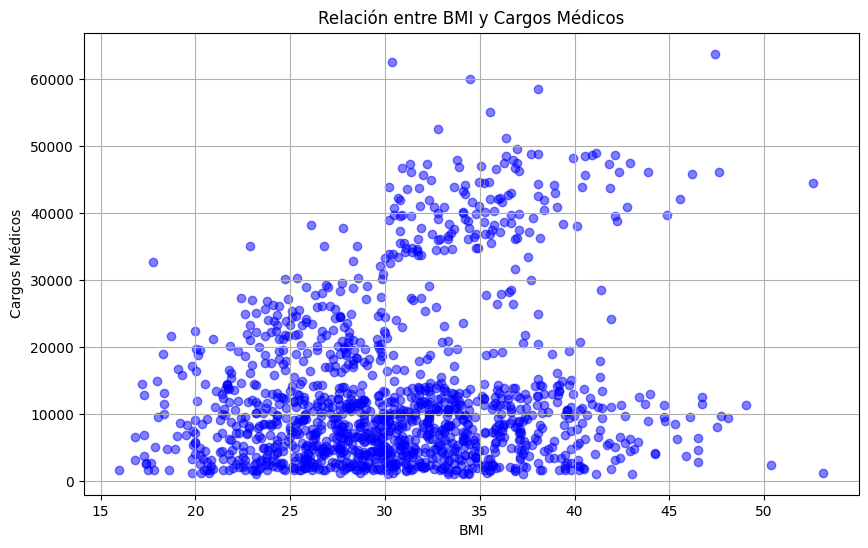

In [10]:
# Crea un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['bmi'], df['charges'], alpha=0.5, color='blue')
plt.title('Relación entre BMI y Cargos Médicos')
plt.xlabel('BMI')
plt.ylabel('Cargos Médicos')
plt.grid(True)
# Muestra el gráfico
plt.show()

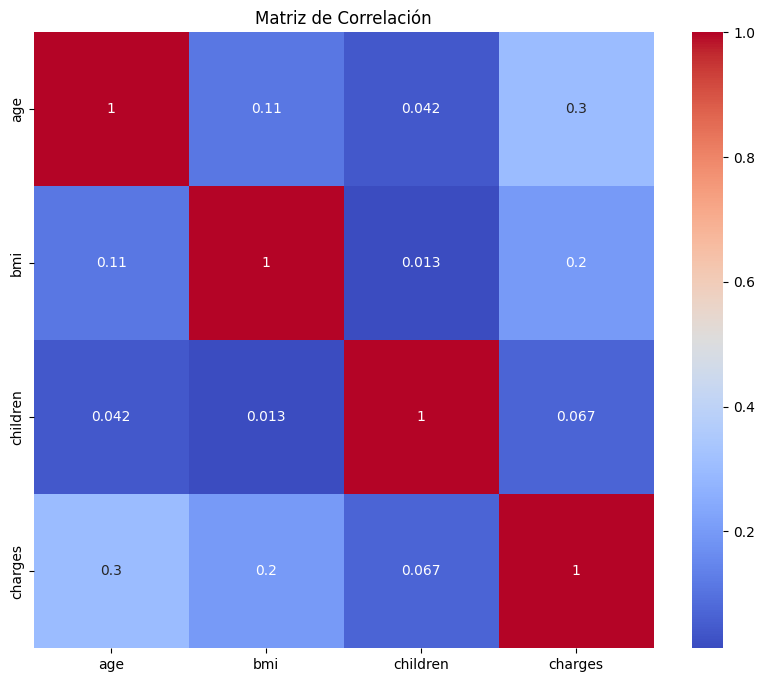

In [11]:
numerical_columns1 = df.select_dtypes(include=[np.number])
# Calcular la matriz de correlación
correlation_matrix = numerical_columns1.corr()
# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [12]:
# Supongamos que tienes un DataFrame llamado “df”.
# Vamos a dividirlo en dos partes: una con las columnas numéricas y otra con las categóricas.
# Selecciona solo las columnas numéricas del DataFrame “df”.
# 'include=[np.number]' le dice a pandas que solo queremos columnas que contengan números.
columnas_numericas = df.select_dtypes(include=[np.number])


# Ahora seleccionamos las columnas categóricas.
# 'include=['object', 'category']' le dice a pandas que incluya columnas de tipo objeto o categoría,
# que generalmente son las que contienen texto o categorías.
columnas_categoricas = df.select_dtypes(include=['object', 'category'])


In [13]:
# Convierte las columnas categóricas a un formato numérico usando 'pd.get_dummies'.
# Esto crea una nueva columna por cada categoría única en cada columna categórica.
# Por ejemplo, si una columna tiene 'rojo', 'verde', 'azul', get_dummies crea tres columnas,
# una para cada color, y pone un 1 en la columna que corresponde al color de esa fila.
categ_bin = pd.get_dummies(columnas_categoricas, columns=columnas_categoricas.columns)

#.get_dummies lo pasa a Booleano, y con .astype(int) lo convierte a tipo integer. (numero entero)
categ_bin = pd.get_dummies(columnas_categoricas, columns=columnas_categoricas.columns).astype(int)

categ_bin

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [14]:
# Ahora, vamos a unir (concatenar) las columnas numéricas y las nuevas columnas categóricas.
# 'pd.concat' es una función que une DataFrames.
# Le pasamos una lista de los DataFrames que queremos unir, en este caso, 'columnas_numericas' y 'categ_bin'.
# 'axis=1' significa que queremos unirlos lado a lado (columna a columna).
# Si fuera 'axis=0', los uniríamos uno encima del otro (fila a fila).
df_new = pd.concat([columnas_numericas, categ_bin], axis=1)

df_new.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.00,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.70,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.88,0,3866.86,0,1,1,0,0,1,0,0


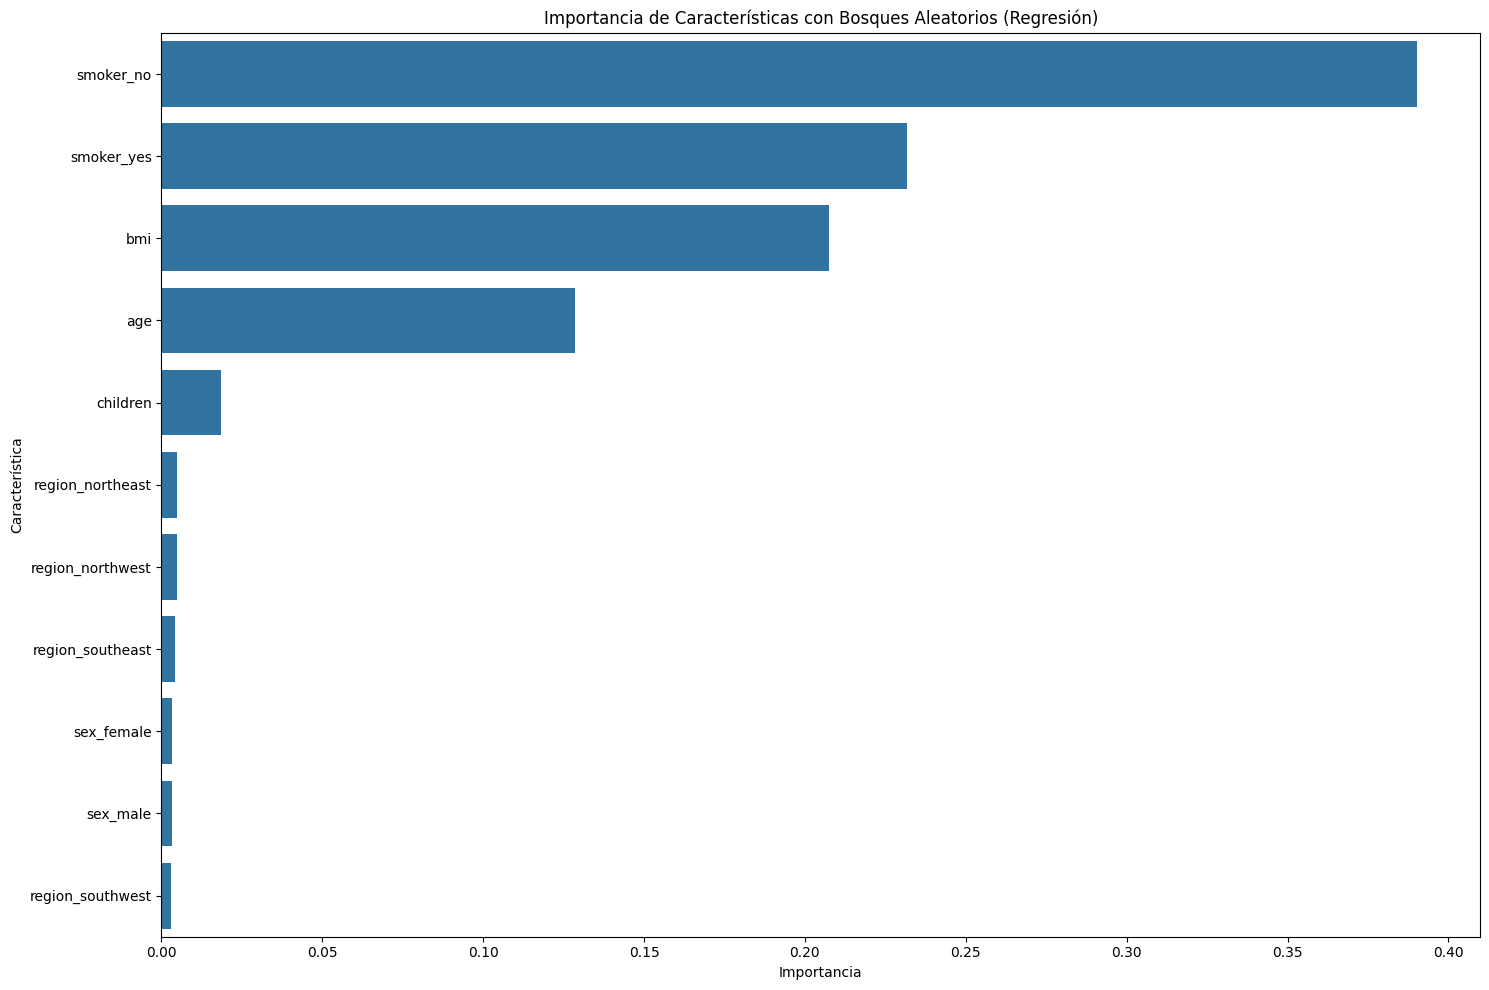

In [28]:
# Suponiendo que la columna 'charges' es tu variable objetivo
X = df_new.drop('charges', axis=1)  # Aquí quitamos la columna 'charges' de los datos y guardamos el resto en “X”.
y = df_new['charges']               # Aquí guardamos solo la columna 'charges' en “y”. y es lo que queremos predecir.
# Crear el modelo de Bosques Aleatorios
clf = RandomForestRegressor(n_estimators=100)  # Creamos un modelo de bosque aleatorio para regresión con 100 árboles.
clf.fit(X, y)                                  # Entrenamos el modelo con los datos. 'fit' significa ajustar el modelo a los datos.
# Obtener importancia de características
importancias = clf.feature_importances_       # Después de entrenar, preguntamos al modelo cuán importantes son las características.
# Crear un DataFrame para visualizar las importancias
df_importancia = pd.DataFrame({               # Creamos un nuevo cuadrito (DataFrame) para poner las importancias de manera ordenada.
    'Característica': X.columns,              # En la columna 'Característica' ponemos los nombres de las características.
    'Importancia': importancias               # Y en 'Importancia', cuán importante es cada característica según el modelo.
})
# Ordenar el DataFrame por importancia
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)  # Ordenamos el cuadrito para que las más importantes estén arriba.
# Mostramos las importancias de las características en un gráfico
plt.figure(figsize=(15, 10))                 # Preparamos un espacio grande para dibujar un gráfico.
sns.barplot(x='Importancia', y='Característica', data=df_importancia)  # Dibujamos un gráfico de barras con las importancias.
plt.title('Importancia de Características con Bosques Aleatorios (Regresión)')  # Le ponemos un título al gráfico.
plt.xlabel('Importancia')                    # Etiquetamos el eje horizontal con 'Importancia'.
plt.ylabel('Característica')                 # Y el eje vertical con 'Característica'.
plt.tight_layout()                           # Ajustamos todo para que se vea bonito y claro.
plt.show()                                   # ¡Y mostramos el gráfico!


In [16]:
#Dropeamos las columnas que tienen poca importancia
datos_limpios = df_new.drop(['sex_male','sex_female', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1)

datos_limpios

,age,bmi,children,charges,smoker_no,smoker_yes
0,19,27.90,0,16884.92,0,1
1,18,33.77,1,1725.55,1,0
2,28,33.00,3,4449.46,1,0
3,33,22.70,0,21984.47,1,0
4,32,28.88,0,3866.86,1,0
...,...,...,...,...,...,...
1333,50,30.97,3,10600.55,1,0
1334,18,31.92,0,2205.98,1,0
1335,18,36.85,0,1629.83,1,0
1336,21,25.80,0,2007.94,1,0


In [17]:
#Separamos el dataframe de la variable a predecir (charges)
X = datos_limpios.drop(["charges"], axis=1)
y = datos_limpios["charges"]

In [18]:
# Separando datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Usando LazyRegressor
reg = LazyRegressor()
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
# Imprimiendo los resultados
models

  0%|          | 0/42 [00:00<?, ?it/s]

100%|██████████| 42/42 [00:06<00:00,  6.96it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 5
[LightGBM] [Info] Start training from score 13030.203373


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.90,0.90,4258.72,0.16
HistGradientBoostingRegressor,0.88,0.89,4591.23,0.35
LGBMRegressor,0.88,0.88,4637.42,0.05
KNeighborsRegressor,0.87,0.87,4812.92,0.01
RandomForestRegressor,0.87,0.87,4921.38,0.51
BaggingRegressor,0.87,0.87,4926.54,0.08
AdaBoostRegressor,0.86,0.87,4952.07,0.11
ExtraTreesRegressor,0.84,0.85,5317.72,0.43
XGBRegressor,0.84,0.85,5320.96,0.06


R-Squared (R^2) - Coeficiente de determinación: Este valor te dice qué tan cerca estuvieron tus lanzamientos al poste. Si tu R^2 es 1 (o 100%), significa que todos tus aros cayeron perfectamente en el poste. 

Si tu R^2 es 0 (o 0%), significa que todos tus aros estuvieron muy lejos. En tu caso, 0.88 significa que tus aros estuvieron cerca del poste en un 88% de las veces, ¡es un buen puntaje!

Adjusted R-Squared: Es como el R^2, pero toma en cuenta cuántos aros lanzaste. Es una forma más precisa de medir qué tan bien lanzaste. En tu caso, es 0.87, lo que sigue siendo muy bueno.

RMSE (Root Mean Square Error): Imagina que cada vez que lanzas un aro, mides qué tan lejos o cerca quedó del poste. El RMSE te da una idea del error promedio en tus lanzamientos. Si el RMSE es 0, significa que todos tus aros cayeron perfectamente. En tu caso, el RMSE es 4355.94, lo que podría parecer un número grande, pero todo depende de cómo lo compares con otros modelos o situaciones.

Time Taken: Es el tiempo que tardaste en lanzar todos tus aros. En este caso, tardaste 0.18 segundos en lanzar y ver dónde cayeron.

In [19]:
# Imagina que X son factores como la edad, el peso, etc., y y es el costo del seguro.
# Queremos averiguar cómo estos factores afectan el costo del seguro.
# Primero, añadimos una constante a X para tener un punto de partida.
X = sm.add_constant(X)  # Esto es como añadir una línea base en un experimento.
# Ahora, creamos un modelo para entender cómo estos factores afectan el costo del seguro.
model = sm.OLS(y, X)  # Esto es como hacer un experimento para ver la relación.
# Luego, ajustamos el modelo a nuestros datos para obtener los resultados.
results = model.fit()  # Esto es como analizar los resultados del experimento.
# Ahora, podemos usar estos resultados para entender mejor cómo los factores afectan el costo del seguro.


In [20]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     996.5
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:42:57   Log-Likelihood:                -13541.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1332   BIC:                         2.712e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -129.0829    630.295     -0.205      0.8

Dep. Variable: charges - Esto significa que estamos viendo cómo diferentes cosas afectan el "costo del seguro" (charges). Es como decir: "Estoy tratando de entender cómo diferentes cosas cambian el precio del seguro de salud".

R-squared: 0.750 - Este número nos dice qué tan bien nuestro modelo de experimento explica lo que estamos viendo. Un 0.750 es como tener un 75% en un examen. Significa que nuestro modelo explica el 75% de los cambios en el precio del seguro. Cuanto más cercano a 1, mejor es nuestro modelo.

Adj. R-squared: 0.749 - Es parecido al R-squared, pero es un poco más preciso, especialmente cuando comparamos modelos con diferentes números de cosas (variables) que estamos estudiando. En nuestro caso, también es como un 75%, lo que es bastante bueno.

F-statistic y Prob (F-statistic) - Estos números son como una prueba para ver si nuestro experimento en general tiene sentido o no. Un 'Prob (F-statistic)' cercano a 0 (como el nuestro) significa que lo que estamos estudiando es importante y no es solo por casualidad.
coef - Estos son los resultados de nuestro experimento. Nos dicen cómo cada cosa (como la edad, el BMI, etc.) afecta el precio del seguro. Por ejemplo, 'age' tiene un coeficiente de 257.8495, lo que significa que por cada año más de edad, el costo del seguro tiende a aumentar en aproximadamente 257.85 unidades.

std err - Este número nos dice qué tan seguros estamos de estos 'coef'. Piénsalo como el margen de error en un experimento. Mientras más bajo, más confiamos en los resultados.

t y P>|t| - Estos números nos ayudan a entender si lo que encontramos es importante. Si 'P>|t|' es muy pequeño (como lo es en nuestro caso para todas las variables), significa que estamos bastante seguros de que lo que encontramos no es solo por casualidad.
[0.025 0.975] - Esto es como el rango en el que estamos bastante seguros de que nuestros 'coef' son correctos. Es como decir: "Creemos que el verdadero efecto de la edad está entre 234.512 y 281.187".


¡Eso es todo! Como científicos, usamos todos estos números para entender mejor cómo diferentes cosas afectan el costo del seguro de salud. ¡Es como resolver un gran rompecabezas!

Residuos:
Omnibus: 301.480 - Este número es parte de una prueba llamada "prueba de Omnibus". Piensa en esto como una forma de revisar si los errores en tu modelo de experimento (un poco como errores en tus deberes) tienen un patrón extraño. Un número más bajo es mejor. Aquí, un número alto sugiere que tal vez hay algo extraño en los errores de nuestro modelo.

Prob(Omnibus): 0.000 - Esto nos dice qué tan probable es que los resultados de la prueba de Omnibus sean solo por casualidad. Un número cercano a 0, como este, significa que probablemente no es solo casualidad, y deberíamos revisar más a fondo nuestro modelo.

Skew: 1.215 - Este número mide si los errores en nuestro modelo están sesgados de alguna manera, como si se inclinaran más hacia un lado que hacia el otro. Un número cercano a 0 significa que no hay sesgo. Aquí, 1.215 sugiere un cierto grado de sesgo, como si los errores se inclinaran en una dirección.

Kurtosis: 5.654 - La curtosis mide si hay extremos raros (como valores muy altos o muy bajos) en los errores de tu modelo. Un número más alto que 3, como el nuestro, sugiere que hay más extremos de lo normal. Es como decir que nuestro modelo tiene más sorpresas de lo esperado.

Jarque-Bera (JB): 722.157 y Prob(JB): 1.53e-157 - Estos números son parte de otra prueba (prueba de Jarque-Bera) que también revisa si hay algo raro en los errores de nuestro modelo. Un 'Prob(JB)' muy bajo, como este, nos dice que probablemente hay algo inusual en cómo se distribuyen los errores.

Durbin-Watson: 2.087 - Este número nos ayuda a entender si los errores en nuestro modelo están relacionados entre sí de una manera específica (lo que llamamos autocorrelación). Un número cerca de 2, como el nuestro, es bueno porque sugiere que no hay mucha autocorrelación.

Cond. No.: 2.52e+16 - Este es un número que nos dice algo sobre la precisión de nuestro modelo. Si es muy alto, puede significar que hay problemas con la forma en que estamos midiendo las cosas. Aquí, un número tan alto sugiere que podríamos tener que ser cuidadosos con cómo interpretamos los resultados.

In [21]:
residuos = results.resid

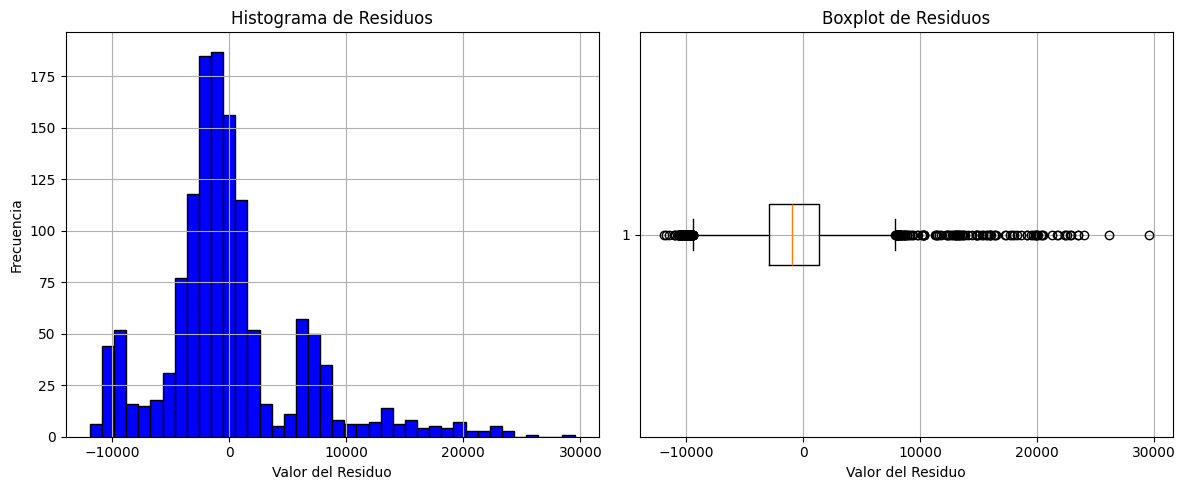

In [22]:
# Crea una figura con dos subgráficos (uno para el histograma y otro para el boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)
# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)
# Muestra la figura con ambos gráficos
plt.tight_layout()  # Ajusta los márgenes para evitar superposiciones
plt.show()

En estas gráficas, estás viendo la distribución de "residuos". Los residuos son básicamente las diferencias entre lo que nuestro modelo predijo y lo que realmente sucedió. Si nuestro modelo fuera perfecto, todos los residuos serían cero, porque nuestras predicciones coincidirían exactamente con los valores reales. Pero en la vida real, siempre hay algunas diferencias.

Histograma de Residuos (a la izquierda):
Este gráfico nos muestra cuántas veces (Frecuencia) ocurrió cada valor de residuo.
La mayoría de los residuos están agrupados alrededor de 0, lo que es una buena señal. Significa que la mayoría de las veces, nuestro modelo estuvo bastante cerca de predecir el valor real.
Hay algunos residuos negativos y positivos que son muy grandes, lo que significa que hubo algunas veces que nuestro modelo se equivocó por mucho. Pero estas son menos frecuentes.

Boxplot de Residuos (a la derecha):
Este gráfico nos da una idea rápida de cómo se distribuyen los residuos.
La caja en el centro nos muestra dónde están la mayoría de los residuos. La línea naranja en el medio de la caja es la mediana, que es el valor del residuo en el medio cuando los ordenamos.
Los "bigotes" (líneas que se extienden desde la caja) nos muestran el rango en el que se encuentran la mayoría de los residuos.
Los puntos fuera de los bigotes se llaman "outliers" o valores atípicos. Estos son valores de residuos que son mucho mayores o menores que la mayoría de los otros residuos. Son casos en los que nuestro modelo se equivocó mucho.


En resumen, estos gráficos te están mostrando cómo de bueno (o malo) es tu modelo al hacer predicciones. La idea es que quieras que la mayoría de tus residuos estén cerca de 0 y que no tengas muchos valores atípicos. Si ves que muchos residuos están lejos de 0, o si tienes muchos valores atípicos, puede que quieras reconsiderar tu modelo o los datos que estás usando. ¡Es como revisar tu trabajo en un examen para asegurarte de que no cometiste muchos errores!

In [23]:
#valor medio de los residuos
residuos.mean()

3.704915440341119e-11

In [24]:
_, p_value = stats.shapiro(residuos)
p_value

1.062206697780434e-28

El valor que te ha dado, 9.995016687979667×10−29

9.995016687979667×10−29, es un número muy pequeño y cercano a cero. En términos prácticos, puede considerarse casi cero.
Dado que este es el valor p de la prueba de Shapiro-Wilk que realizaste, un valor p tan pequeño indica que puedes rechazar la hipótesis nula de que los residuos tienen una distribución normal.
En otras palabras, basándonos en esta prueba, los residuos no se distribuyen normalmente. Esto puede tener implicaciones en las conclusiones que saques de tu modelo, ya que la normalidad de los residuos es una de las suposiciones en muchas técnicas de regresión. Es posible que necesites investigar más a fondo o considerar transformaciones o modelos diferentes.

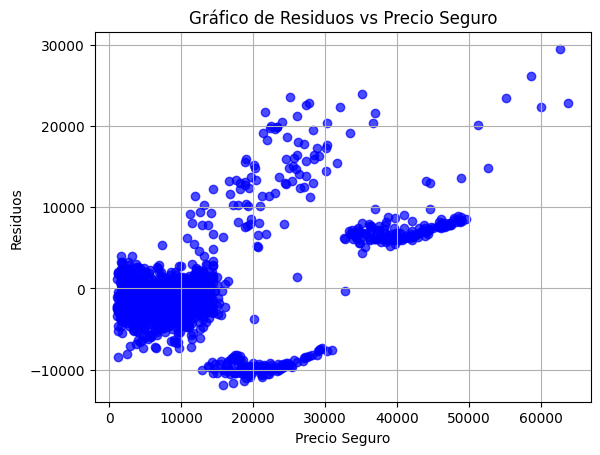

In [25]:
# Crea el gráfico de residuos versus valores ajustados
plt.scatter(y, residuos, c='blue', alpha=0.7)
plt.title('Gráfico de Residuos vs Precio Seguro')
plt.xlabel('Precio Seguro')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

El gráfico que estás viendo es como un juego de dardos. Imagina que tienes un dardo y un tablero. En lugar de apuntar al centro del tablero, tu objetivo es lanzar el dardo de manera que caiga justo en la línea horizontal del medio, que está marcada como "0". Esa línea del medio es como tu objetivo perfecto.
Las pelotitas azules que ves son como los lugares donde han caído tus dardos. Algunas pelotitas están cerca de la línea del medio, y otras están más lejos.

Precio seguro (Eje X): Representa cuánto predices que costará el seguro según el número de habitaciones o cualquier otro factor que estés considerando.

Residuos (Eje Y): Muestra cuánto te has desviado de tu predicción. Si una pelotita está justo en la línea del medio, significa que tu predicción fue perfecta. Pero si está arriba o abajo, significa que te has pasado o te has quedado corto en tu predicción.
Por ejemplo, si ves una pelotita azul muy arriba, significa que predijiste un precio muy bajo para ese seguro en comparación con el precio real. Y si está muy abajo, predijiste un precio muy alto.

La idea es que quieras que la mayoría de las pelotitas estén lo más cerca posible de la línea del medio. Si muchas pelotitas están dispersas por todo el lugar, significa que tus predicciones no son muy buenas. Pero si la mayoría están cerca de la línea del medio, ¡estás haciendo un buen trabajo!
En resumen, este gráfico te ayuda a ver qué tan buenas (o malas) son tus predicciones en comparación con los precios reales de los seguros.

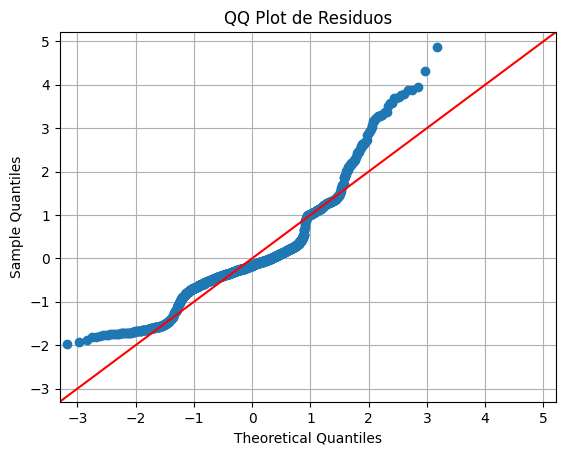

In [26]:
# Crea un QQ plot de los residuos
fig = sm.qqplot(residuos, line='45', fit=True)
plt.title('QQ Plot de Residuos')
plt.grid(True)
plt.show()

El gráfico que estás mostrando es un QQ Plot (Quantile-Quantile Plot) de los residuos. Este tipo de gráfico es utilizado para evaluar si un conjunto de datos sigue una distribución específica, en la mayoría de los casos, la distribución normal.

Aquí está lo que nos dice el QQ Plot:
Eje X (Theoretical Quantiles): Representa los cuantiles de una distribución teórica, en este caso, una distribución normal.
Eje Y (Sample Quantiles): Representa los cuantiles de los residuos de tu modelo.
Línea roja: Es la línea de referencia, que representa dónde deberían caer los puntos si los residuos siguieran perfectamente una distribución normal.
Puntos azules: Representan los residuos de tu modelo.

Cómo interpretarlo:
Si los residuos siguen perfectamente una distribución normal, los puntos azules deberían caer sobre la línea roja a través de todo el gráfico.
En tu gráfico, la mayoría de los puntos siguen la línea roja en el centro, pero se desvían en los extremos. Esto indica desviaciones de la normalidad en las colas.
La desviación en los extremos sugiere que hay residuos que tienen valores extremos (tanto en el lado positivo como en el negativo) que no son consistentes con lo que se esperaría de una distribución normal.

Conclusiones:
La desviación de los residuos de la línea roja indica que los residuos no siguen exactamente una distribución normal, especialmente en las colas. Esto podría ser una señal de que hay heteroscedasticidad en los datos o que hay valores atípicos que el modelo no está manejando bien.
Es importante recordar que muchos modelos de regresión asumen que los residuos son normalmente distribuidos, así que si los residuos se desvían significativamente de esta suposición, podría ser necesario reconsiderar el modelo o realizar algunas transformaciones en los datos.
Sin embargo, en la práctica, una pequeña desviación de la normalidad puede ser aceptable, especialmente si el tamaño de la muestra es grande. Es importante balancear la interpretación teórica del QQ Plot con el contexto práctico y el propósito del análisis.

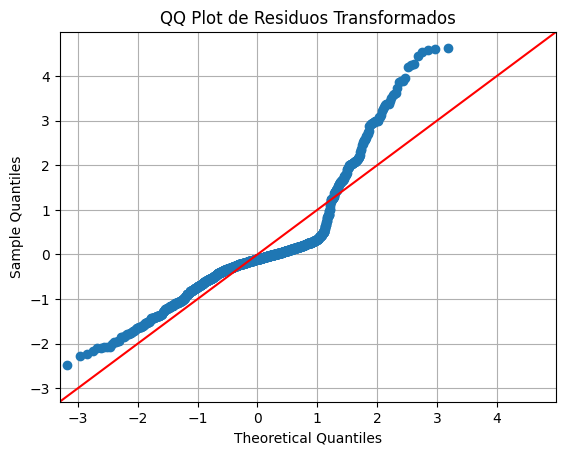

In [27]:
# Transforma la variable dependiente (por ejemplo, si es 'y')
y_transformed = np.log1p(y)
# Suponiendo que 'X' es tu matriz de características
model_transformed = sm.OLS(y_transformed, X).fit()
# Obtener residuos del nuevo modelo
residuos_transformed = model_transformed.resid
# Puedes graficar un nuevo QQ Plot para los residuos transformados para evaluar su normalidad
fig = sm.qqplot(residuos_transformed, line='45', fit=True)
plt.title('QQ Plot de Residuos Transformados')
plt.grid(True)
plt.show()